In [2]:
"""
Calculate electric field strength at a distance

23-Nov-22   CBL Original
24-Nov-22   CBL error in FS calculation
            Set this up to be calibrated against a known AM station
            
References:
https://ham.stackexchange.com/questions/10076/how-do-you-calculate-the-field-strength-at-a-given-distance
https://www.ahsystems.com/EMC-formulas-equations/field-intensity-calculation.php

Next look at the FCC field strength contours and match up.
"""
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def Watts2FS(Source, Distance):
    """
    @Source   - Watts power at source
    @Distance - vector of distances (Volts)
    """
    
    """ Propigate this, thinking of it as the Poynting vector"""
    TestPoint       = Source/(4.0*np.pi*np.power(Distance,2.0))
    """
    P=E^2/R, E = sqrt(P*R)
    Use 377 ohms as free space impedance
    """
    ReferenceImpedance = 377.0 # Ohms
    Voltage = np.sqrt(TestPoint * ReferenceImpedance)
    """ 
    24-Nov-22 Divide by the distance it has to be dV/ds, was V/s
    So If I don't do dV/ds my calculation is identical. dV/ds is much smaller, but this matches the article
    and seems to be within 1.5dB of the predicted testpoint which could be a matter of antenna gain. 
    """
    dV = np.diff(Voltage)
    ds = np.diff(Distance)
    FS = np.abs(dV/ds) # the differences are negative, but don't care
    return Voltage[1:]

In [17]:
def Zoomer():
    """
    Zoomer radio CFZM 

    Coordinates: 43°34′30″N 79°49′02″W
    Distance = 546km
    """
    Power = 50000.0 # Watts at transmitter. 
    Distance = np.arange(1.0, 550000,1000)
    AntennaGain = 1.0
    P = Power*AntennaGain
    return P, Distance

In [18]:
def Peekskill():
    """ 
    Use the AM radio station in Peekskill, New York.
    https://en.wikipedia.org/wiki/WLNA
    Antenna Coordinates: 41°18′31.13″N 73°54′59.0868″W, 1.9kM from house at Cortlandt Ave
    https://www.fcc.gov/media/radio/figure8
    https://www.fcc.gov/media/radio/am-query
    F = 1420KHz
    https://transition.fcc.gov/fcc-bin/amq?list=0&facid=54852
    https://transition.fcc.gov/Bureaus/MB/Databases/AM_DA_patterns/445bc69f439c4205a14bc1b6063ebeb7-21377.pdf
    Primary gain is to about 155 degrees magnetic.
    Our location is aproximately 95 degrees magnetic, kind of side lobe but definiely gain. 
    From the plot, seeing 161mV/m E field at 1kM from the antenna. (pretty strong!)
    """
    """ Distance to test point"""
    Distance = np.arange(100.0, 3000.0, 100.0)
    """
    Power should go down as 1/r^2
    """
    DaytimePower    = 5000.0 # Watts
    NighttimePower  = 1000.0 # Watts
    AntennaGain     = 2.5    # dB, don't quite know how to estimate this
    P = NighttimePower * AntennaGain
    return P, Distance

Ratio between calculation and testpoint: []  dB  []


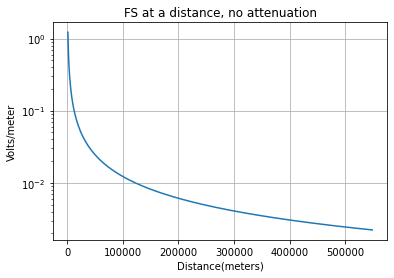

In [19]:

""" 
Propigate this, thinking of it as the Poynting vector
The FCC plot is calibrated for 1kW at source
"""
#Power,Distance = Peekskill()
Power,Distance = Zoomer()
FS = Watts2FS(Power, Distance)
TestPoint = 261.0e-3   # Volts/meter at 1kM from chart
# Where is 1kM in distance vector? 
idx = np.where(Distance==1000.0)
ratio = TestPoint/FS[idx]
dBOff = 10.0*np.log10(ratio)
print("Ratio between calculation and testpoint:", ratio, " dB ", dBOff)
"""
Off by approximately 468, (~27dB) why? 27dB is far too much for antenna gain alone. 
"""
plt.semilogy(Distance[1:],FS)
plt.title("FS at a distance, no attenuation")
plt.xlabel("Distance(meters)")
plt.ylabel("Volts/meter")
plt.grid(True)

Ratio between calculation and testpoint: [1.50686645]  dB  [1.78074764]


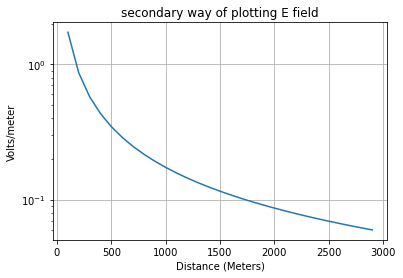

In [5]:
"""
Using the ham exchange calculation
"""
P_T = 1000.0 # transmitter Power in watts
G_T = 1.0    # Antenna gain
S = P_T * G_T/(4.0*np.pi*np.power(Distance,2.0))
E = np.sqrt(377.0*S)
plt.semilogy(Distance, E)
plt.title("secondary way of plotting E field")
plt.xlabel("Distance (Meters)")
plt.ylabel("Volts/meter")
plt.grid(True)

idx = np.where(Distance==1000.0)
ratio = TestPoint/E[idx]
dBOff = 10.0*np.log10(ratio)
print("Ratio between calculation and testpoint:", ratio, " dB ", dBOff)
""" OK this is way closer"""
